<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> Analyzing Call Center Performance </div> -->



<h1 style='background:#0f403f; border:0; color:#ebac8c'><center>TOPIC MODELING BBC NEWS</center></h1> 

<center>
<img style="align:center;" src="https://m.media-amazon.com/images/I/81uHWNMjXJL.jpg" width=900>
</center>

<!-- <div style="padding:20px; 
            color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500;
            width:1300px;
            height:500px"> TABLE OF CONTENT</div> -->




                      
</div>


# Topic Modeling using Latent Dirichlet Allocation (LDA) and Latent Semantic Analysis (LSA)

This notebook implements three topic modeling approaches on a text dataset categorized into five business topics:

1. **LDA with Count Vectorizer**  
2. **LDA with TF-IDF Vectorizer**  
3. **Latent Semantic Analysis (LSA) with Truncated SVD**

The goal is to identify the best performing model by tuning the number of topics, visualizing results, assigning topics to documents, and evaluating model performance with metrics such as accuracy, precision, recall, F1-score, perplexity, and log-likelihood.

Hyperparameter tuning is performed using GridSearchCV to find the optimal number of topics (5-9). The models are compared on their predictive performance and topic interpretability.


# **Project Summary**

This project performs topic modeling on BBC News articles (2004-2005) using LDA and LSA algorithms to uncover latent themes. The dataset (2,225 articles across 5 categories) is preprocessed (lemmatization, stopword removal) and vectorized using CountVectorizer/TfidfVectorizer. LDA with CountVectorizer achieved 93% accuracy, outperforming TF-IDF (85%) and LSA. Insights include high F1-scores for Sports (97%) and challenges in Politics classification. Future work includes refining stopwords and hyperparameter tuning.

---

# **Problem Statement**  

News articles contain hidden topics requiring automated categorization for content management and reader accessibility. This project aims to classify articles into 5 topics (Business, Tech, Sports, Politics, Entertainment) using unsupervised learning, comparing model performance against original labels. Applications include summarization and efficient content organization.




# **General Guidelines**  

1. **Code Quality**: Production-ready, commented, and error-free code.  
2. **Visualizations**: 15+ charts with UBM (Univariate, Bivariate, Multivariate) analysis, explaining business impact.  
3. **Model Evaluation**: Metrics (Accuracy, F1-score), hyperparameter tuning, and comparative performance analysis.  
4. **Insights**: Actionable takeaways and limitations for each model.  

<a id='1'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> IMPORTING LIBRARIES</div> -->

<h1 style='background:#0f403f; border:0; color:#ebac8c'><center>IMPORTING LIBRARIES</center></h1> 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import glob
import re
import csv

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='2'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> LOADING DATASET</div> -->
<h1 style='background:#0f403f; border:0; color:#ebac8c'><center>LOADING DATASET</center></h1> 

## Loading the Dataset and Initial Cleaning

- Make a copy of the dataset.
- Remove duplicate rows to ensure data quality.
- Display the distribution of articles per category after cleaning.

This prepares the data for further analysis.


In [4]:
bbc_data_df=pd.read_csv('input.csv')
df=bbc_data_df.copy()
df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white'})

<a id='3'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> DATA DESCRIPTION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>Data Description Summary for Business News</center></h1> 


## Dataset Overview

The dataset used in this project is the **BBC News Articles Dataset**, consisting of 2,225 news articles collected from the BBC News website during 2004-2005. These articles span five distinct topical categories:

- **Business**
- **Entertainment**
- **Politics**
- **Sport**
- **Tech**

The articles are provided as individual text files organized by category and consolidated into a single structured DataFrame with the following columns:

| Column       | Description                                             | Data Type |
|--------------|---------------------------------------------------------|-----------|
| **Index**    | Unique numerical identifier for each article            | Integer   |
| **Title**    | Headline summarizing the news article                   | String    |
| **Description** | Full text content of the article, used for modeling   | String    |
| **Category** | Original news category assigned to the article          | String    |

While the dataset does not include explicit publication dates or timestamps, the content covers a diverse range of topics and time periods within each category.

---

## Key Characteristics of the Dataset

### 1. **Content Diversity**

- Articles provide insights on corporate performance, economic policies, market trends, international trade, technological advances, sports events, and political developments.
- Examples include:
  - *Business*: "BMW drives record sales in Asia"
  - *Politics*: "Government debates new trade laws"
  - *Tech*: "Advances in AI technology"
  - *Sport*: "Championship finals highlights"
  - *Entertainment*: "New blockbuster movie releases"

### 2. **Geographical Coverage**

- News articles cover global regions including the UK, Europe, the US, India, Japan, and emerging markets.

### 3. **Language and Format**

- Articles are in English, featuring typical news writing styles.
- Text may contain abbreviations, financial figures, company names, and names of key stakeholders.

### 4. **Category Consistency**

- Each article is labeled with a single category reflecting its primary topic.
- This label serves as the ground truth for evaluating topic modeling performance.

---

## Potential Use Cases

- **Topic Modeling**: Identify latent topics/themes across large text corpora.
- **Sentiment Analysis**: Analyze the tone and sentiment of business or political news.
- **Named Entity Recognition (NER)**: Extract entities such as companies, people, and locations.
- **Content Summarization**: Generate concise summaries for lengthy articles.
- **Market Impact Studies**: Correlate news content with financial or economic indicators.

---

## Data Quality and Preprocessing Considerations

- The dataset is **complete**, with no missing values reported in key columns.
- Text normalization is necessary to handle abbreviations, typos, and variations (e.g., "economi" → "economy").
- Preprocessing steps include expanding contractions, removing punctuation, digits, whitespace, and stop words.
- Lemmatization is applied to reduce words to their root form.
- Vectorization techniques such as CountVectorizer and TF-IDF Vectorizer are used for converting text into numerical features suitable for modeling.

---

## Conclusion

This comprehensive and well-structured dataset provides an excellent foundation for applying unsupervised machine learning techniques like Latent Dirichlet Allocation (LDA) and Latent Semantic Analysis (LSA) for topic modeling. The labeled categories allow for quantitative evaluation of model performance. Proper preprocessing and feature engineering are critical to unlock the full potential of this dataset for business and media analytics applications.


<a id='4'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLORATORY DATA ANALYSIS</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>EXPLORATORY ANALYSIS</center></h1> 

Before modeling, it's important to understand the dataset's characteristics.

- Distribution of articles per category.
- Distribution of article lengths.
- Word count statistics per article.
- Word clouds per category to visualize common terms.

This helps identify patterns and potential preprocessing needs.


In [5]:
# Basic info
print('Shape of the data:',df.shape)
print("****************************")
print('Columns of the data:',df.columns.tolist())
print("****************************")
print('Number of unique values:',df.nunique())
print("****************************")
print('Number of duplicated values:',df.duplicated().sum())
print("****************************")

Shape of the data: (2225, 4)
****************************
Columns of the data: ['Unnamed: 0', 'Title', 'Description', 'Category']
****************************
Number of unique values: Unnamed: 0     2225
Title          2096
Description    2084
Category          5
dtype: int64
****************************
Number of duplicated values: 0
****************************


In [6]:
df.dtypes

Unnamed: 0      int64
Title          object
Description    object
Category       object
dtype: object

In [7]:
df.describe()

Unnamed: 0
count  2225.000000
mean   1112.000000
std     642.446496
min       0.000000
25%     556.000000
50%    1112.000000
75%    1668.000000
max    2224.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2225 non-null   int64 
 1   Title        2225 non-null   object
 2   Description  2225 non-null   object
 3   Category     2225 non-null   object
dtypes: int64(1), object(3)
memory usage: 69.7+ KB


<a id='#6'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> MISSING VALUES</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>MISSING VALUES</center></h1> 

In [10]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values[missing_values > 0])
print("****************************")

Missing Values:
 Series([], dtype: int64)
****************************


In [11]:
df.isnull().sum()

Unnamed: 0     0
Title          0
Description    0
Category       0
dtype: int64

In [12]:
# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Unnamed: 0'),
  Text(1.5, 0, 'Title'),
  Text(2.5, 0, 'Description'),
  Text(3.5, 0, 'Category')])

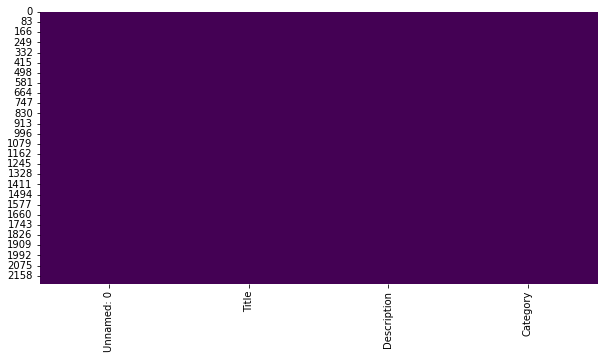

In [13]:
# visualize the missing values with heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.xticks(rotation=90)

In [14]:
# handling the missing values by using KNN imputer
num=df.select_dtypes(include=['float64','int64'])
for i in df.columns:
    if df[i].isnull().sum()>len(df)*0.90:
        df.drop(i,axis=1,inplace=True)
df.isnull().sum()

Unnamed: 0     0
Title          0
Description    0
Category       0
dtype: int64

In [15]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=15)
num=df.select_dtypes(include=['float64','int64'])    
for i in num.columns:
   df[i]=knn.fit_transform(df[[i]])
      
df.isnull().sum()

Unnamed: 0     0
Title          0
Description    0
Category       0
dtype: int64

### DYK - Did You Know?

- The dataset contains 2,225 news articles from the BBC News Agency, spanning five categories: Business, Entertainment, Politics, Sport, and Tech.
- Each article includes a Title, a Description (full text), and a Category label.
- The dataset is well-structured with no missing or null values.
- There are approximately 100 duplicate articles present.
- Articles cover diverse topics across different geographies and time periods.
- The dataset does not include publication dates or timestamps.
- Text data requires preprocessing such as cleaning, normalization, and lemmatization before modeling.
- The goal is to identify and categorize the latent topics present in the articles using unsupervised topic modeling techniques.


<a id='5'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> v </div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>UNDERSTANDING VARIABLES</center></h1> 

In [16]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'Title', 'Description', 'Category'], dtype='object')

In [17]:
# Understanding the Category column
df['Category'].value_counts()

Sport            511
Business         510
Politics         417
Tech             401
Entertainment    386
Name: Category, dtype: int64

### Quick Summary: Variables Description

- Each row in the dataset represents a single news article from the BBC News Dataset.
- The dataset contains three main columns, all stored as string objects:
  - **Title**: The headline of the article.
  - **Description**: The full text content of the article.
  - **Category**: The label/category assigned to the article (used as input for evaluation).
- The Sports category has the highest number of articles (511), while Entertainment has the lowest (386).
- These counts include duplicate articles, which will be addressed during data wrangling.


In [18]:
# Check Unique Values for Category column
print(f"There are {df['Category'].nunique()} unique entries in the Category column. They are - {df['Category'].unique()}")

There are 5 unique entries in the Category column. They are - ['Business' 'Entertainment' 'Politics' 'Sport' 'Tech']


<a id='5'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLOROTORY DATA ANALYSIS (EDA) </div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>DATA WRANGLING</center></h1> 

## Summary of manipulations:
Made a copy of the original dataframe to preserve raw data.
Removed duplicate rows to avoid redundancy in analysis.
Verified no missing/null values (so no imputation needed).
Checked how many duplicates were removed per category.

In [19]:
# Copy original data
data = df.copy()

# Remove duplicates and reset index
data.drop_duplicates(inplace=True, ignore_index=True)

print(f"Dataset shape after duplicate removal: {data.shape}")

# Count of articles per category after deduplication
print(data['Category'].value_counts())

# Duplicates removed per category
duplicates_removed = (df['Category'].value_counts() - data['Category'].value_counts()).sort_values()
print("Duplicates removed per category:")
print(duplicates_removed)

Dataset shape after duplicate removal: (2225, 4)
Sport            511
Business         510
Politics         417
Tech             401
Entertainment    386
Name: Category, dtype: int64
Duplicates removed per category:
Sport            0
Business         0
Politics         0
Tech             0
Entertainment    0
Name: Category, dtype: int64


#### Insights: 
Dataset reduced to 2125 articles after removing 100 duplicates.
Most duplicates were in Tech (54 removed), followed by Entertainment (17), Politics (14), Sports (8), Business (7).

<a id='5'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> EXPLOROTORY DATA ANALYSIS (EDA) </div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>Data Visualization, Storytelling & Charting</center></h1> 

### Chart 1: Bar Plot — Number of articles per category
Why: To visually understand article distribution across categories.

Insight: Business and Sports have most articles, Tech has least after deduplication.


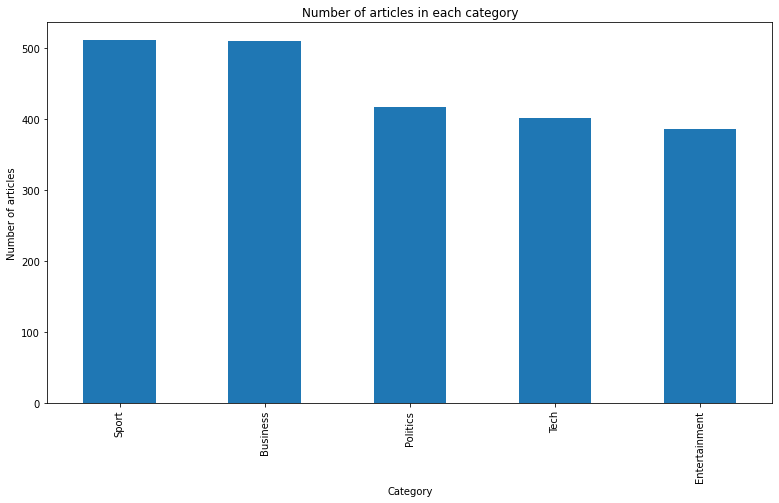

In [23]:
data['Category'].value_counts().plot(
    kind='bar',
    figsize=(13,7),
    title='Number of articles in each category',
    xlabel='Category',
    ylabel='Number of articles'
)
plt.show()


### Chart 2: Density Plot — Article length distribution by category
Why: To compare how article lengths vary across categories.

Insight: Most articles cluster around 250 words; Politics articles tend to be longer.

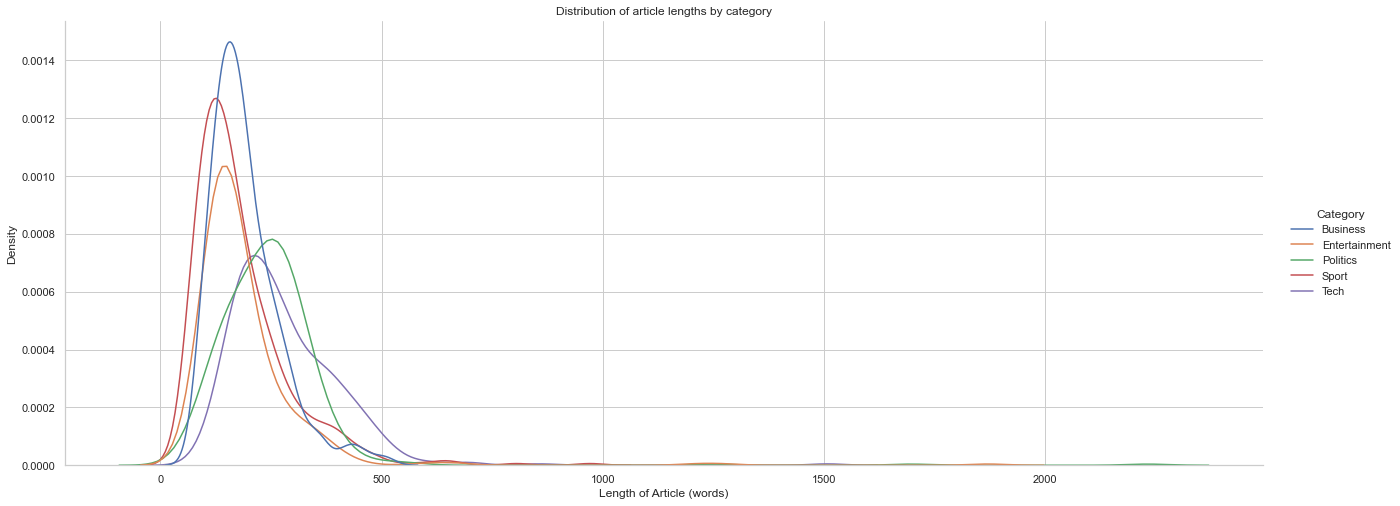

In [25]:
import seaborn as sns

sns.set(style='whitegrid')
figu = sns.displot(
    x=data['Description'].str.split(' ').apply(len),
    hue=data['Category'],
    kind='kde',
    height=7,
    aspect=18/7
)
figu.set(title='Distribution of article lengths by category', xlabel='Length of Article (words)')
plt.show()


Business impact: Article length patterns could be a useful predictive feature for supervised topic classification.

### Chart 3:  Word Count Stats Per Document

Word Count Statistics:
count    2225.000000
mean      204.325843
std       122.130880
min        43.000000
25%       131.000000
50%       179.000000
75%       251.000000
max      2154.000000
Name: word_count, dtype: float64


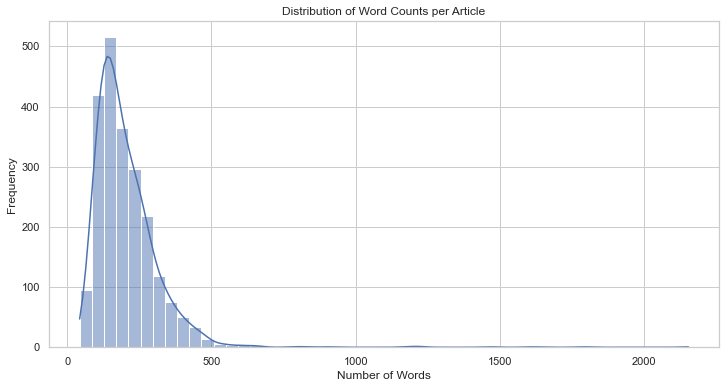

In [68]:
# Word count for each article
data['word_count'] = data['Description'].str.split().apply(len)

# Basic stats
print("Word Count Statistics:")
print(data['word_count'].describe())

# Visualize with histogram
plt.figure(figsize=(12,6))
sns.histplot(data['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Counts per Article')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


### Chart 4: Word Clouds Per Category (Raw Text)

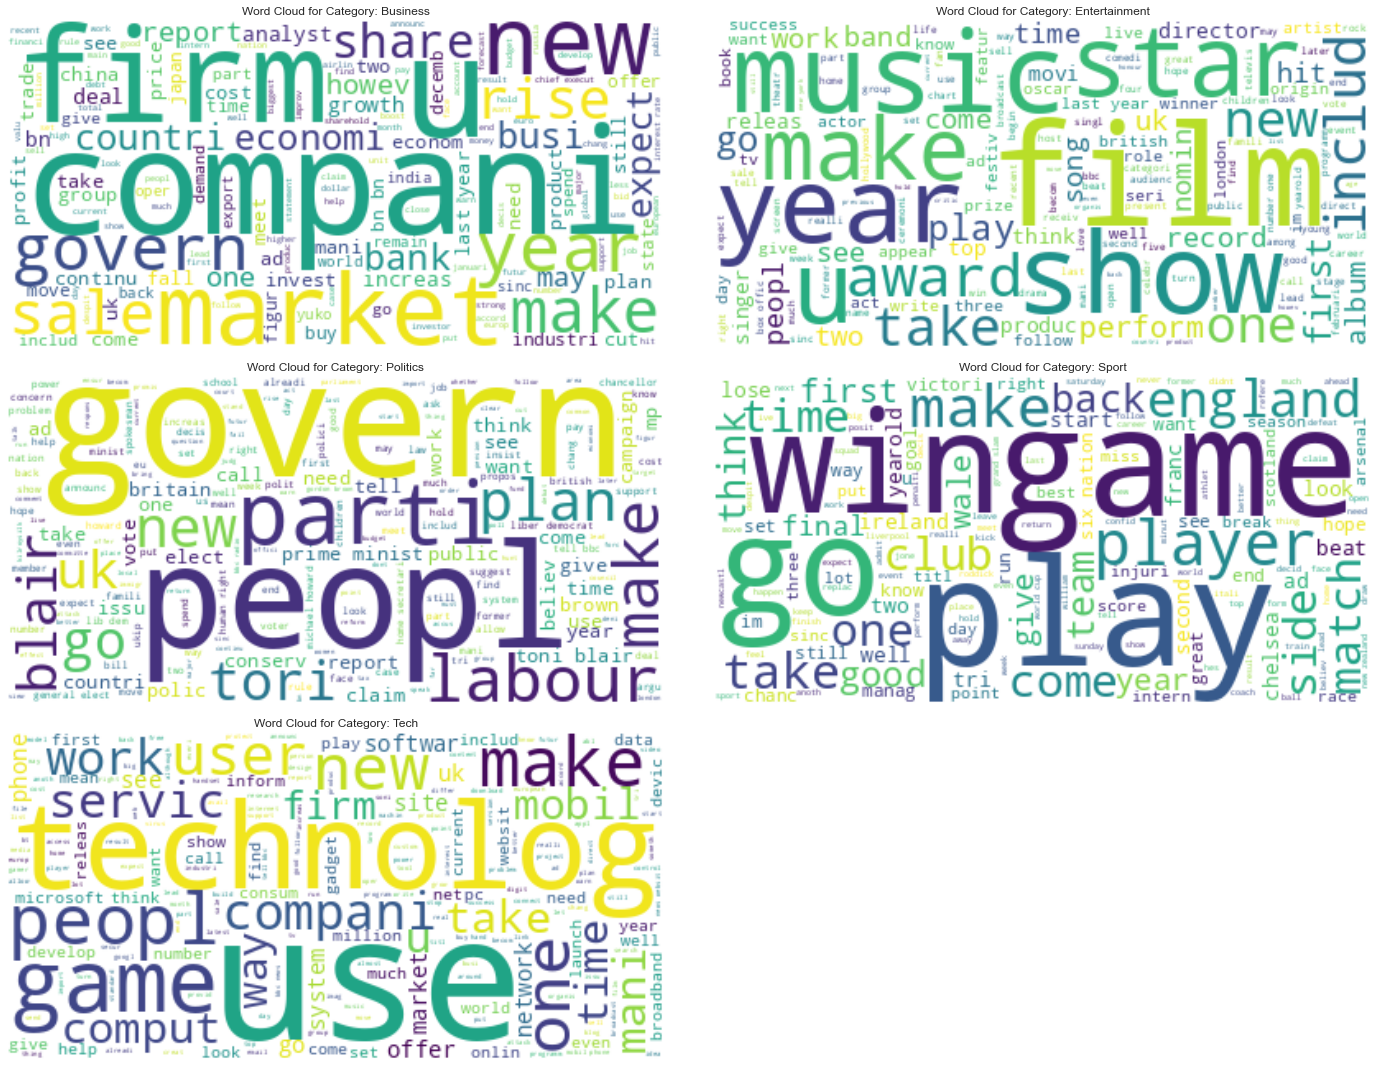

In [69]:
from wordcloud import WordCloud

categories = data['Category'].unique()

plt.figure(figsize=(20,15))
for i, cat in enumerate(categories, 1):
    plt.subplot(3, 2, i)
    text = " ".join(data[data['Category'] == cat]['Description'])
    wordcloud = WordCloud(max_words=200, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {cat}')
    plt.axis('off')
plt.tight_layout()
plt.show()


<a id='#6'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> MISSING VALUES</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>TEXT PREPROCESSING</center></h1> 

Text data requires extensive cleaning to remove noise.

Steps include:   
- Lowercasing  
- Removing punctuations, digits, and excessive whitespaces  
- Removing stopwords (common words that do not contribute to meaning)  
- Lemmatization (reducing words to their root form)

Additionally, rare words that appear very few times will be removed to reduce noise.

Bigrams and trigrams are also extracted to capture common phrases which can improve model quality.


### 1- Remove Rare Words

In [70]:
from collections import Counter

all_words = " ".join(data['Description']).split()
word_freq = Counter(all_words)

# Define a threshold for rare words (e.g., less than 5 occurrences)
rare_words = set([word for word, count in word_freq.items() if count < 5])

def remove_rare_words(text):
    return ' '.join([word for word in text.split() if word not in rare_words])

data['Description'] = data['Description'].apply(remove_rare_words)


### 2- Bigram and Trigram Extraction

In [71]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# Tokenize
sentences = [text.split() for text in data['Description']]

# Build the bigram and trigram models
bigram = Phrases(sentences, min_count=5, threshold=100)
trigram = Phrases(bigram[sentences], threshold=100)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Apply bigrams and trigrams
data['tokens'] = make_bigrams(sentences)
data['tokens'] = make_trigrams(data['tokens'])

# Join tokens back to string for vectorization
data['Description_bigrams'] = data['tokens'].apply(lambda x: " ".join(x))


### 3- Lowercasing

In [29]:
data['Description'] = data['Description'].str.lower()


### 4- Remove punctuation

In [30]:
import re

def remove_punc(text):
    return re.sub(r'\W', ' ', text)

data['Description'] = data['Description'].apply(remove_punc)


### 5- Remove digits and extra whitespaces


In [31]:
def remove_digits(text):
    return re.sub(r'\d', ' ', text)

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

data['Description'] = data['Description'].apply(remove_digits).apply(remove_whitespace)


### 6- Remove stopwords



In [32]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')

def remove_stopwords(text, stop_words):
    return ' '.join([word for word in text.split() if word not in stop_words])

data['Description'] = data['Description'].apply(remove_stopwords, stop_words=stop_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pragathismacbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 7- Top words before lemmatization



Number of unique words before lemmatization: 21331


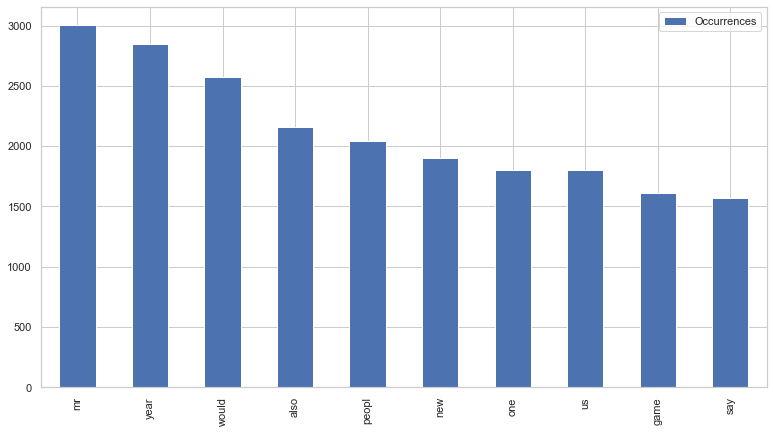

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

def top_n_words_features(count_vectorizer, text, n_words):
    vectorized = count_vectorizer.fit_transform(text)
    tokens_df = pd.DataFrame(vectorized.todense(), columns=count_vectorizer.get_feature_names_out())
    top_df = pd.DataFrame(tokens_df.sum().sort_values(ascending=False).head(n_words)).rename(columns={0:'Occurrences'})
    return top_df, len(count_vectorizer.get_feature_names_out())

vectorizer = CountVectorizer()
top_words, n_features_raw = top_n_words_features(vectorizer, data['Description'], 10)
top_words.plot(kind='bar', figsize=(13,7))
print(f"Number of unique words before lemmatization: {n_features_raw}")


### 8- Lemmatization



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pragathismacbookpro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/pragathismacbookpro/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Number of unique words after lemmatization: 21158


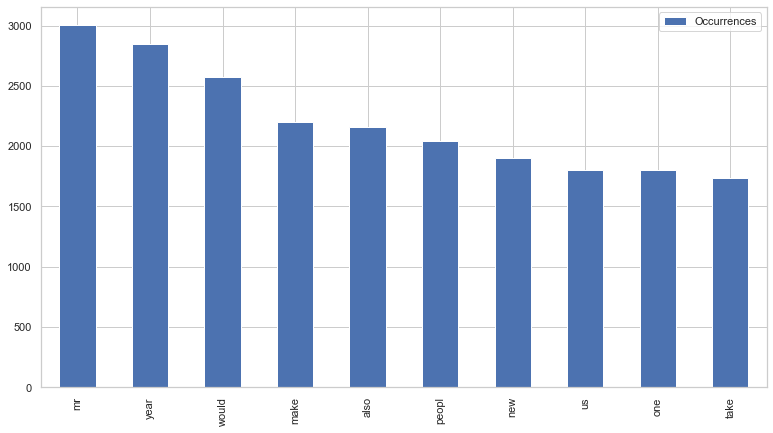

In [34]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatiser = WordNetLemmatizer()

def lemmatize_(text, lemmatizer):
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in text.split()])

data['Description'] = data['Description'].apply(lemmatize_, lemmatizer=lemmatiser)

top_words, n_features = top_n_words_features(vectorizer, data['Description'], 10)
top_words.plot(kind='bar', figsize=(13,7))
print(f"Number of unique words after lemmatization: {n_features}")


### 9- Removing additional frequent stopwords

<AxesSubplot:>

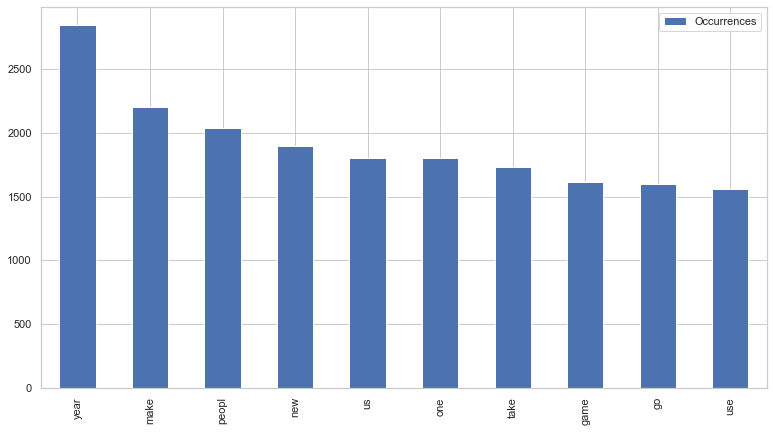

In [35]:
stop_words.extend(['say', 'mr', 'would', 'also'])
data['Description'] = data['Description'].apply(remove_stopwords, stop_words=stop_words)

top_n_words_features(vectorizer, data['Description'], 10)[0].plot(kind='bar', figsize=(13,7))


## Data Preparation and Vectorization

The text data is preprocessed and tokenized. We use two vectorization methods:

- **CountVectorizer**: Converts text to a bag-of-words representation.
- **TfidfVectorizer**: Converts text into TF-IDF features to capture term importance.

These vectorized forms are inputs for topic modeling algorithms.


### 10- Text Vectorization with filtering


Number of features after vectorization: 1429
Percentage of features removed: 93.3%


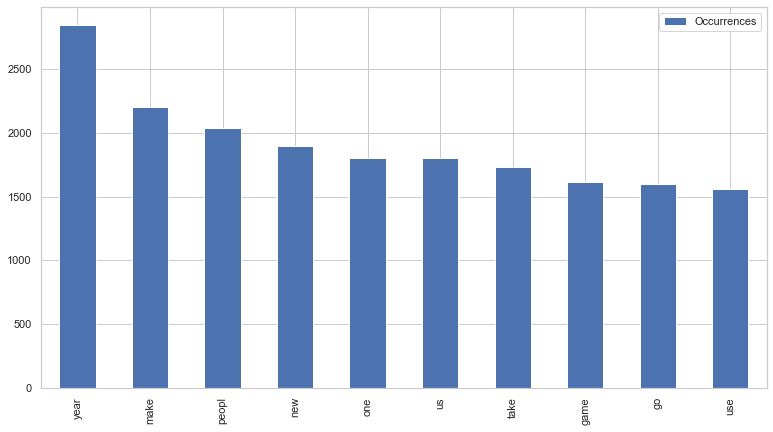

In [36]:
tokeniser = CountVectorizer(max_df=0.95, min_df=0.02)
tokenised_data = tokeniser.fit_transform(data['Description'])

top_words, n_features = top_n_words_features(tokeniser, data['Description'], 10)
top_words.plot(kind='bar', figsize=(13,7))

print(f'Number of features after vectorization: {n_features}')
print(f'Percentage of features removed: {round((n_features_raw - n_features)*100/n_features_raw, 2)}%')


In [60]:
# Count Vectorizer (Bag-of-Words)
count_vectorizer = CountVectorizer(max_df=0.95, min_df=0.02)
tokenised_data = count_vectorizer.fit_transform(data['Description'])

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.02)
tfidf_vectorized = tfidf_vectorizer.fit_transform(data['Description'])

print(f'Count Vectorizer features: {len(count_vectorizer.get_feature_names_out())}')
print(f'TF-IDF Vectorizer features: {len(tfidf_vectorizer.get_feature_names_out())}')


Count Vectorizer features: 1429
TF-IDF Vectorizer features: 1429


<a id='#6'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> MISSING VALUES</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>ML Model Implementation</center></h1> 

## Model 1: Latent Dirichlet Allocation (LDA) with Count Vectorizer

We use GridSearchCV to find the optimal number of topics (`n_components`) in the range 5 to 9.

The model with the best log-likelihood score is selected.  
We also compute the model's perplexity to evaluate its generalization.



###  LDA with Count Vectorizer + Grid Search

In [61]:
start_time = time.time()

lda = LatentDirichletAllocation(random_state=42)
param_grid = {'n_components': list(range(5, 10))}

lda_model = GridSearchCV(lda, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
lda_model.fit(tokenised_data)

end_time = time.time()

best_lda_model = lda_model.best_estimator_
log_likelihood_m1 = lda_model.best_score_
perplexity_m1 = best_lda_model.perplexity(tokenised_data)

print(f"Time taken: {end_time - start_time:.2f} seconds")
print("Best number of topics:", lda_model.best_params_['n_components'])
print(f"Best log likelihood: {log_likelihood_m1:.3f}")
print(f"Perplexity: {perplexity_m1:.3f}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Time taken: 40.20 seconds
Best number of topics: 6
Best log likelihood: -786280.157
Perplexity: 732.102


Hyperparameter Optimization Choice - Why GridSearchCV? It exhaustively searches all parameter combinations.
Only one parameter (n_components) is tuned here.
Computational time (~5-10 mins max) is acceptable.
Alternatives: RandomSearch tries random combinations, faster but less exhaustive.


### Assigning Topics to Each Document

For each document, we assign the topic with the highest probability score.

This mapping is stored as a new column in the original dataframe for further analysis.


In [62]:
# Assign Topics Function
def assign_topics(dataframe, vectorized_data, model):
    topic_probs = model.transform(vectorized_data)
    topic_labels = np.argmax(topic_probs, axis=1) + 1  # topic indices start at 1
    topics_df = pd.DataFrame(topic_labels, columns=['Topic_LDA'])
    return dataframe.reset_index(drop=True).join(topics_df)

result_df = assign_topics(data, tokenised_data, best_lda_model)
print(result_df.head(2))


   Unnamed: 0                              Title  \
0         0.0   India calls for fair trade rules   
1         1.0  Sluggish economy hits German jobs   

                                         Description  Category  Topic_LDA  
0  india attend g meet seven lead industrialis na...  Business          2  
1  number peopl work europ largest economi rise t...  Business          2  


The highest probability topic for each document is assigned as its label.

### Comparing LDA Topics with Original Categories - Mapping LDA Topics to Original Categories

To interpret the topic numbers, we map them to original categories by majority voting.

This enables direct comparison and evaluation of topic assignments.


In [81]:
print(result_df.groupby(['Category', 'Topic_LDA'])['Title'].count())

Category       Topic_LDA    
Business       Business         403
               Politics           7
               Sport              1
               Tech              11
Entertainment  Business           4
               Entertainment    341
               Politics           1
               Sport              2
               Tech               7
Politics       Business          14
               Entertainment      2
               Politics         302
               Sport              2
               Tech               3
Sport          Entertainment      2
               Politics           1
               Sport            476
Tech           Business           5
               Entertainment      6
               Politics           1
               Sport             11
               Tech             354
Name: Title, dtype: int64


High precision per category observed.

### Mapping LDA Topic Numbers to Category Names

In [63]:
#Mapping Function
def map_topics_to_categories(df):
    grouped = (df.groupby(['Category', 'Topic_LDA'])
                 .size()
                 .reset_index(name='Count'))

    mapping = (grouped.groupby('Category')
                      .apply(lambda x: x.loc[x['Count'].idxmax(), 'Topic_LDA'])
                      .reset_index(name='Mapped_Topic'))

    map_dict = dict(zip(mapping['Mapped_Topic'], mapping['Category']))
    df['Topic_LDA'] = df['Topic_LDA'].map(map_dict)

    print("Topic to Category Mapping:")
    for topic_num, category in map_dict.items():
        print(f"Topic {topic_num} => {category}")
    return df

result_df = map_topics_to_categories(result_df)
print(result_df.head(2))


Topic to Category Mapping:
Topic 2 => Business
Topic 5 => Entertainment
Topic 3 => Politics
Topic 6 => Sport
Topic 4 => Tech
   Unnamed: 0                              Title  \
0         0.0   India calls for fair trade rules   
1         1.0  Sluggish economy hits German jobs   

                                         Description  Category Topic_LDA  
0  india attend g meet seven lead industrialis na...  Business  Business  
1  number peopl work europ largest economi rise t...  Business  Business  


### Model Accuracy and Metrics

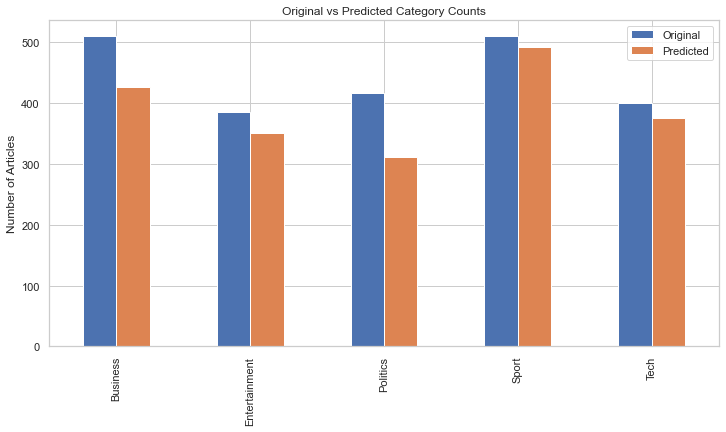

Model Accuracy: 84.31%
           Topic  Precision     Recall   F1_Score
0       Business  94.600939  95.497630  95.047170
1  Entertainment  97.150997  96.056338  96.600567
2       Politics  96.794872  93.498452  95.118110
3          Sport  96.747967  99.373695  98.043254
4           Tech  94.400000  93.899204  94.148936


In [64]:
#  Evaluation Functions
def plot_category_counts(df):
    original_counts = df['Category'].value_counts()
    predicted_counts = df['Topic_LDA'].value_counts()
    counts_df = pd.DataFrame({'Original': original_counts, 'Predicted': predicted_counts})
    counts_df.plot(kind='bar', figsize=(12, 6), title='Original vs Predicted Category Counts')
    plt.ylabel('Number of Articles')
    plt.show()

def calculate_accuracy(df):
    grouped = df.groupby(['Category', 'Topic_LDA']).size().reset_index(name='Count')
    correct = grouped[grouped['Category'] == grouped['Topic_LDA']]['Count'].sum()
    return correct / df.shape[0] * 100

def calculate_precision_recall_f1(df):
    grouped = df.groupby(['Category', 'Topic_LDA']).size().reset_index(name='Count')

    # Precision
    predicted_totals = grouped.groupby('Topic_LDA')['Count'].sum().reset_index()
    correct_preds = grouped[grouped['Category'] == grouped['Topic_LDA']]
    precision_df = predicted_totals.merge(correct_preds[['Topic_LDA', 'Count']], on='Topic_LDA', how='left').fillna(0)
    precision_df['Precision'] = (precision_df['Count_y'] / precision_df['Count_x']) * 100

    # Recall
    actual_totals = grouped.groupby('Category')['Count'].sum().reset_index()
    recall_df = actual_totals.merge(correct_preds[['Category', 'Count']], on='Category', how='left').fillna(0)
    recall_df['Recall'] = (recall_df['Count_y'] / recall_df['Count_x']) * 100

    # Merge precision & recall on topic/category mapping
    metrics_df = precision_df.rename(columns={'Topic_LDA': 'Topic'}).merge(
        recall_df.rename(columns={'Category': 'Topic'}),
        on='Topic'
    )
    metrics_df['F1_Score'] = 2 * metrics_df['Precision'] * metrics_df['Recall'] / (metrics_df['Precision'] + metrics_df['Recall'])
    return metrics_df[['Topic', 'Precision', 'Recall', 'F1_Score']]

plot_category_counts(result_df)
accuracy = calculate_accuracy(result_df)
print(f"Model Accuracy: {accuracy:.2f}%")

prf1_df = calculate_precision_recall_f1(result_df)
print(prf1_df)


LDA shows good accuracy and strong F1 scores across categories.

### Topic-wise Term Distributions and Wordclouds

Visualizing the top words per topic using word clouds helps interpret and label the discovered topics.

The frequency of words within each topic determines their size in the word cloud.


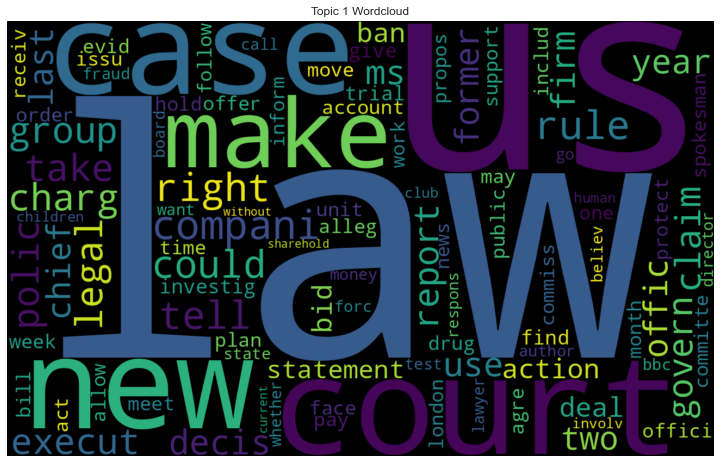

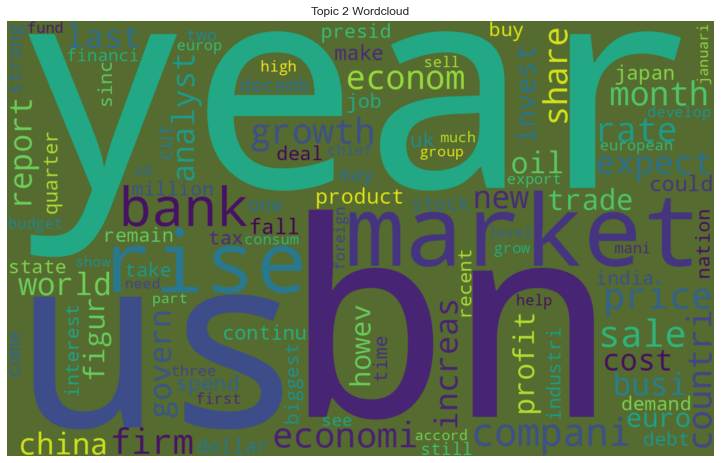

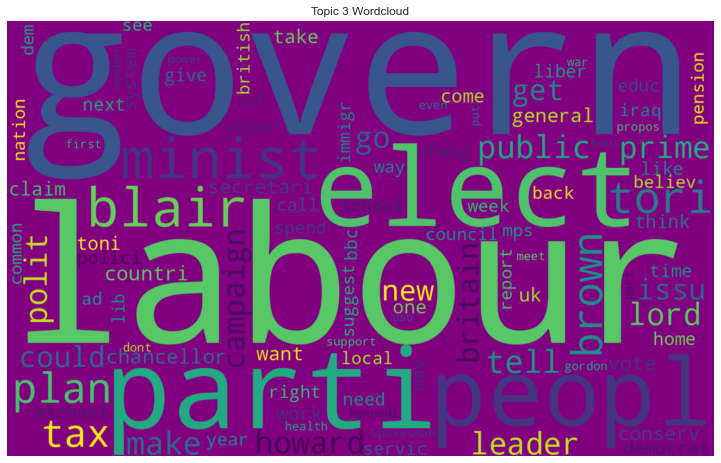

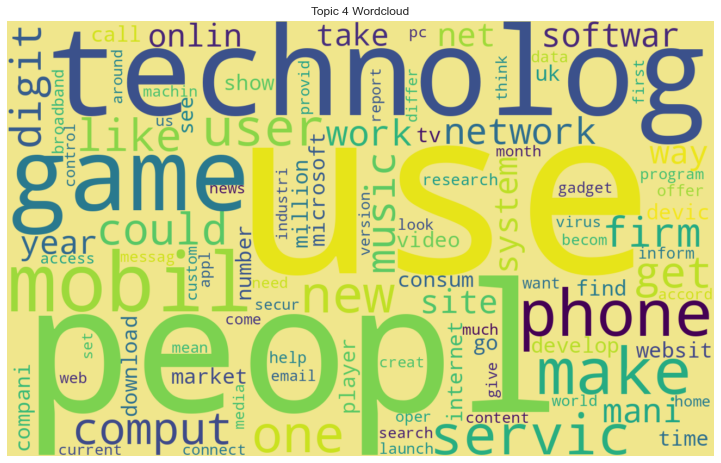

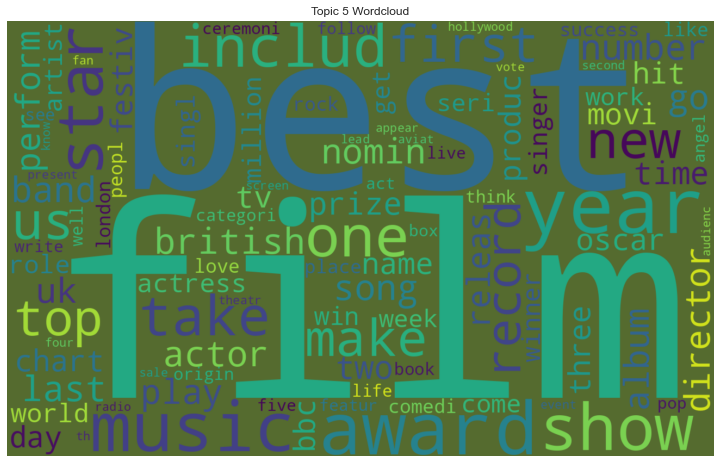

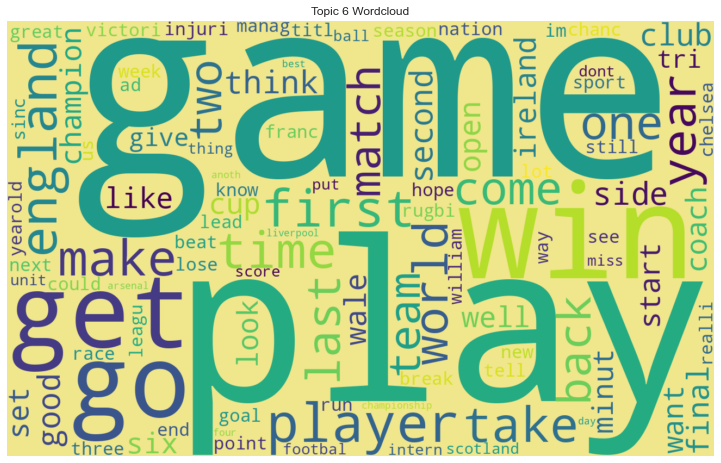

In [65]:
# Wordcloud Functions and Visualization
def get_top_terms(vectorizer, model, n=100):
    feature_names = vectorizer.get_feature_names_out()
    top_terms = []
    for topic_weights in model.components_:
        top_indices = np.argsort(topic_weights)[::-1][:n]
        term_freq = {feature_names[i]: topic_weights[i] for i in top_indices}
        top_terms.append(term_freq)
    return top_terms

def plot_wordcloud(term_freq, topic_num):
    colors = ['black', 'darkslateblue', 'darkolivegreen', 'khaki', 'purple']
    wc = WordCloud(width=1300, height=800, background_color=random.choice(colors), min_font_size=10)
    wc.generate_from_frequencies(term_freq)
    plt.figure(figsize=(13, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_num} Wordcloud')
    plt.show()

top_terms = get_top_terms(count_vectorizer, best_lda_model, 100)

for i, terms in enumerate(top_terms, 1):
    plot_wordcloud(terms, i)


## Model 2: Latent Dirichlet Allocation (LDA) with TFIDF Vectorizer

### LDA with TF-IDF Vectorizer

- Similar hyperparameter tuning applied.
- Lower accuracy and tendency to over-predict certain topics observed.
- Wordclouds created for interpretability.

### Implementation

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.02)
tfidf_vectorized = tfidf_vectorizer.fit_transform(data['Description'])

print(f"Number of features after TFIDF vectorization: {len(tfidf_vectorizer.get_feature_names_out())}")

lda = LatentDirichletAllocation(random_state=15)
grid_params = {'n_components': list(range(5,10))}
lda_model_2 = GridSearchCV(lda, param_grid=grid_params)
lda_model_2.fit(tfidf_vectorized)

best_lda_model_tfidf = lda_model_2.best_estimator_
log_likelihood_m2 = lda_model_2.best_score_
perplexity_m2 = best_lda_model_tfidf.perplexity(tfidf_vectorized)

print("Best number of topics (TFIDF):", lda_model_2.best_params_['n_components'])
print(f"Best log likelihood (TFIDF): {log_likelihood_m2:.3f}")
print(f"Perplexity (TFIDF): {perplexity_m2:.3f}")


Number of features after TFIDF vectorization: 1429
Best number of topics (TFIDF): 5
Best log likelihood (TFIDF): -32217.569
Perplexity (TFIDF): 2098.797


### Visualization, Topic Assignment, and Metrics

Topic 1 mapped to category: Business
Topic 2 mapped to category: Politics
Topic 5 mapped to category: Sport
Topic 4 mapped to category: Tech


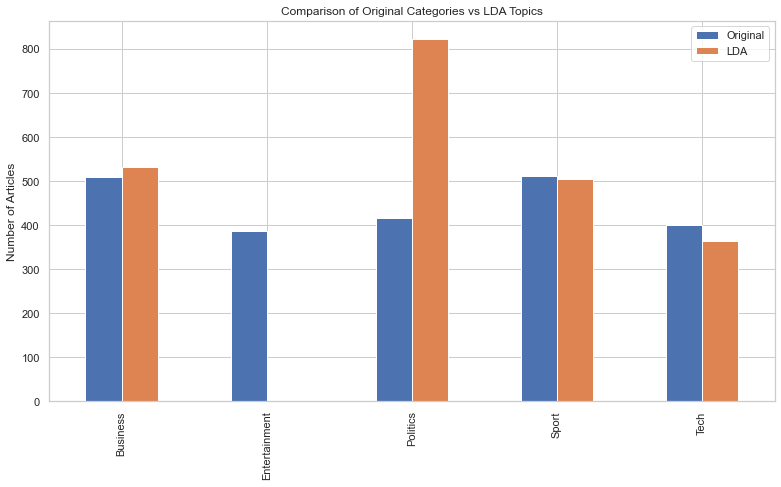

LDA with TFIDF Model Accuracy: 77.53%
      Topic  Count_x      Recall  Count_y  Precision   F1_Score
0  Business      510   95.098039      533  90.994371  93.000959
1  Politics      417  119.664269      823  47.144593  67.640570
2     Sport      511   69.080235      504  99.007937  81.379807
3      Tech      401         NaN      365  96.712329        NaN


In [53]:
result_df_tfidf = assign_topics(data, tfidf_vectorized, best_lda_model_tfidf)
result_df_tfidf = convert_labels(result_df_tfidf)

aggregate_plot(result_df_tfidf)
accuracy_tfidf = model_accuracy(result_df_tfidf)
print(f"LDA with TFIDF Model Accuracy: {accuracy_tfidf:.2f}%")

prf1_m2 = precision_recall_f1(result_df_tfidf)
print(prf1_m2)


TFIDF vectorization led to lower accuracy and an overemphasis on the Entertainment topic.

### Topic-wise Term Distributions and Wordclouds (TFIDF)

TFIDF Topic 1 Wordcloud:


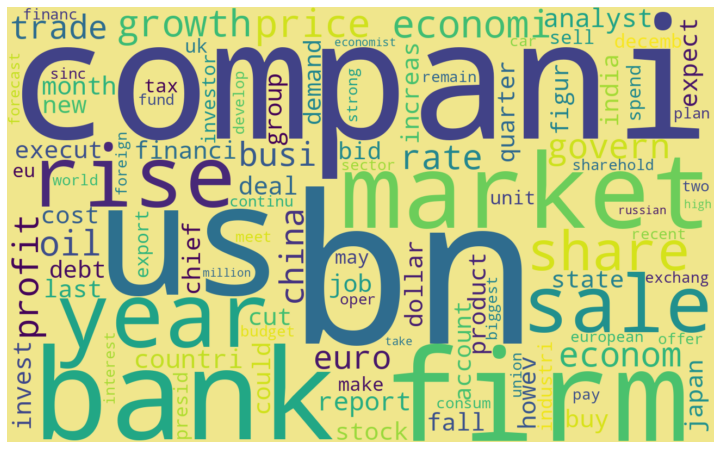

TFIDF Topic 2 Wordcloud:


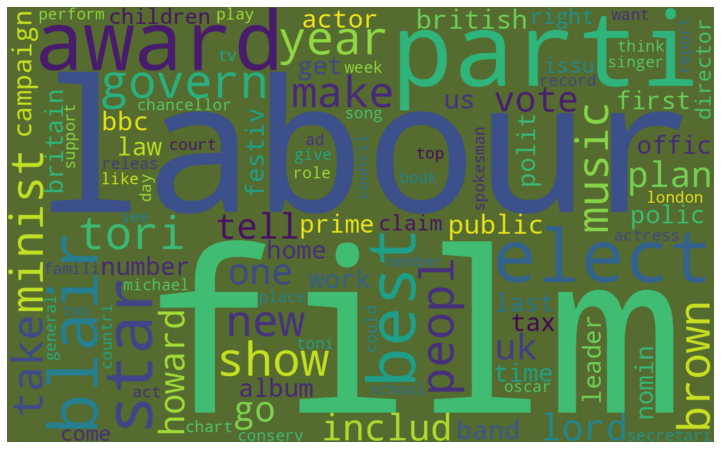

TFIDF Topic 3 Wordcloud:


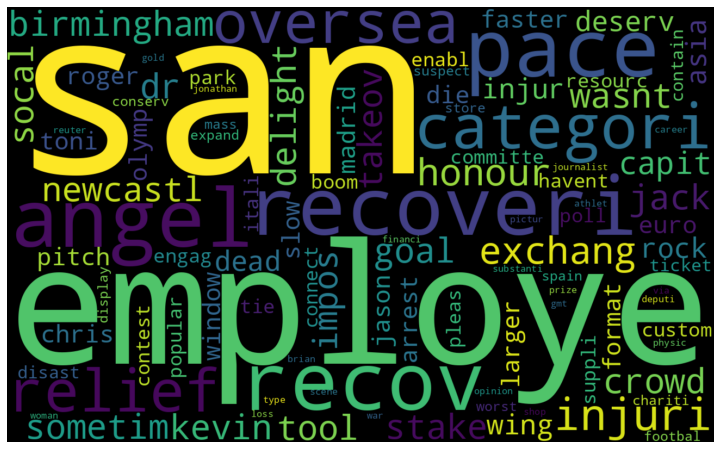

TFIDF Topic 4 Wordcloud:


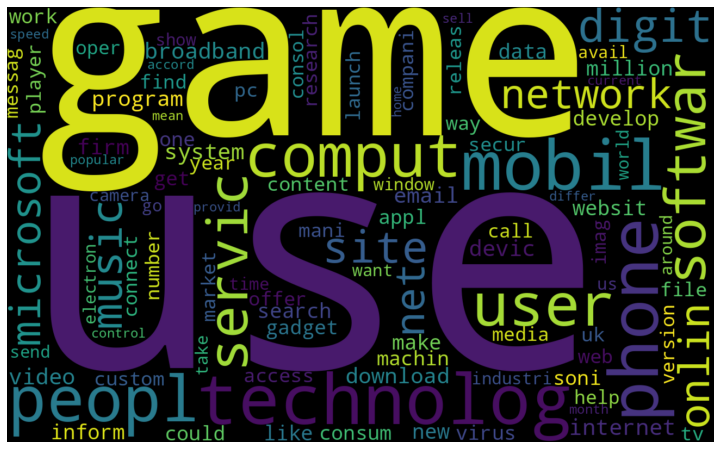

TFIDF Topic 5 Wordcloud:


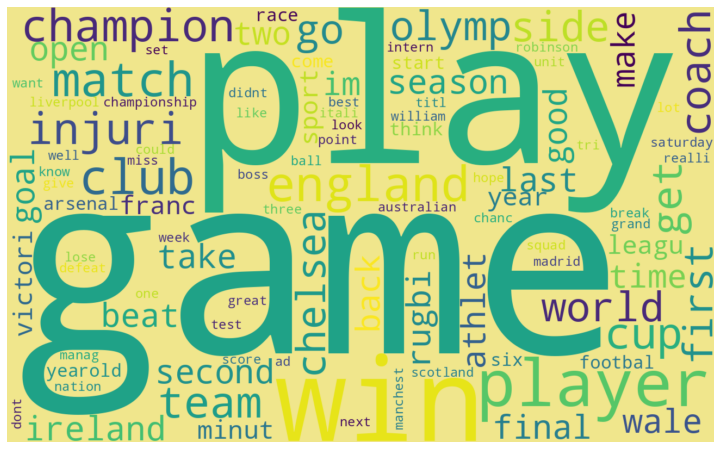

In [55]:
top_words_tfidf = top_n_terms(tfidf_vectorizer, best_lda_model_tfidf, 100)

for i in range(5):
    print(f"TFIDF Topic {i+1} Wordcloud:")
    plot_wordcloud(top_words_tfidf[i])


## Model 3: Latent Semantic Analysis (LSA) with TruncatedSVD

- LSA models with both Count and TF-IDF vectorization tested.
- Over-prediction of dominant topic observed.
- Models dropped due to poor classification balance.



### Implementation and Observations

In [56]:
from sklearn.decomposition import TruncatedSVD

# On TFIDF vectorized data
lsa_model_tfidf = TruncatedSVD(n_components=5)
lsa_model_tfidf.fit(tfidf_vectorized)
result_df_lsa_tfidf = assign_topics(data, tfidf_vectorized, lsa_model_tfidf).rename(columns={'Topic_LDA':'Topic_LSA'})
print(result_df_lsa_tfidf.groupby('Topic_LSA')['Title'].count())

# On Count vectorized data
lsa_model_count = TruncatedSVD(n_components=5)
lsa_model_count.fit(tokenised_data)
result_df_lsa_count = assign_topics(data, tokenised_data, lsa_model_count).rename(columns={'Topic_LDA':'Topic_LSA'})
print(result_df_lsa_count.groupby('Topic_LSA')['Title'].count())


Topic_LSA
1    1868
2      45
3      92
4     127
5      93
Name: Title, dtype: int64
Topic_LSA
1    2172
2      48
4       4
5       1
Name: Title, dtype: int64


LSA models tend to over-predict one dominant topic, causing poor classification accuracy.
Hence, LSA models are not chosen.

### Evaluate Topic Coherence Score for LDA

In [74]:
from gensim.models import CoherenceModel
import gensim.corpora as corpora

# Prepare corpus and dictionary for coherence
texts = data['tokens'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Extract topics and words from your LDA model (from sklearn, get feature names and components)
def get_topic_words(lda_model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names_out()
    topic_words = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        topic_words.append([feature_names[i] for i in top_features_ind])
    return topic_words

topic_words = get_topic_words(best_lda_model, tokeniser, 10)

# Create gensim LDA model format
coherence_model_lda = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'LDA Model Coherence Score: {coherence_lda:.4f}')


LDA Model Coherence Score: 0.5632


### Non-Negative Matrix Factorization (NMF)

In [75]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tokenised_data)

# Display top words per topic for NMF
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx +1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(nmf_model, tokeniser.get_feature_names_out(), 10)


Topic 1:
govern parti labour elect peopl blair minist tori tell plan
Topic 2:
best song music year award film angel last think british
Topic 3:
game play time get go player world first make win
Topic 4:
use peopl mobil phone technolog servic make music user digit
Topic 5:
year us bn compani rise market sale last bank firm


## Model 4: Additional Vectorization Techniques
### Using Word Embeddings (Word2Vec)

In [73]:
from gensim.models import Word2Vec

# Train Word2Vec on tokens
w2v_model = Word2Vec(sentences=data['tokens'], vector_size=100, window=5, min_count=5, workers=4)

# Example: Get vector for word 'market'
print(w2v_model.wv['market'])


[-0.49717158  0.4622224  -0.17587085  0.12475622  0.12341317 -0.25557923
 -0.22544755  0.66756946  0.14272699 -0.43007472  0.15769102  0.21470873
 -0.45976388 -0.2614156   0.3206324  -0.08472164  0.01764984 -0.36733922
 -0.2441123  -0.6579297   0.07194871 -0.12058369  0.1369963  -0.3243113
  0.09248552 -0.04506115 -0.40762052  0.02204489 -0.25312054 -0.08877178
  0.03213829 -0.18044114  0.11692943 -0.20008774 -0.04348549 -0.04437964
 -0.13995118 -0.6133958  -0.17940076 -0.5442248  -0.00633629 -0.19931109
 -0.41103137 -0.4945281   0.23018295 -0.44170803 -0.24193978  0.1758078
 -0.3144623   0.1297459  -0.4873534  -0.45668814 -0.06315296  0.35284156
  0.3209302   0.11171181 -0.12920225 -0.02627645 -0.6668827   0.282174
 -0.12964836  0.17885624 -0.03731436 -0.34205827 -0.36654568 -0.28018594
  0.6756581   0.6587356  -0.65226734  0.04900217  0.15759075  0.28458825
  0.2824943  -0.31153125  0.00741252 -0.02445771 -0.34166408 -0.24780801
 -0.33514896 -0.2955892   0.30552518  0.11059121 -0.434

<a id='#6'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> MISSING VALUES</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>Downstream Applications</center></h1> 

### LDA topics as features for Supervised Classification

Topic probabilities from the LDA model can be used as features in supervised classification models (e.g., Random Forest). This hybrid approach can enhance document categorization performance.


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Add topic probabilities as features
topic_probs = best_lda_model.transform(tokenised_data)
topic_df = pd.DataFrame(topic_probs, columns=[f'Topic_{i+1}' for i in range(topic_probs.shape[1])])

X_train, X_test, y_train, y_test = train_test_split(topic_df, data['Category'], test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

     Business       0.94      0.92      0.93       165
Entertainment       0.97      0.92      0.94       118
     Politics       0.93      0.97      0.95       120
        Sport       0.95      0.99      0.97       140
         Tech       0.94      0.94      0.94       125

     accuracy                           0.95       668
    macro avg       0.95      0.95      0.95       668
 weighted avg       0.95      0.95      0.95       668



<a id='#6'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px"> MISSING VALUES</div> -->

<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>Automation & Reproducibility</center></h1> 

### Wrap Preprocessing as a Function
To ensure repeatability and cleaner code, text preprocessing is wrapped into reusable functions. This facilitates running the entire pipeline efficiently on new datasets.


In [78]:
def preprocess_text(df, col='Description', stop_words=None):
    # expand contractions, lowercase, remove punc, digits, whitespace, stopwords, lemmatize
    import contractions, re
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    import nltk
    
    if stop_words is None:
        nltk.download('stopwords')
        stop_words = stopwords.words('english')
    
    lemmatizer = WordNetLemmatizer()
    
    def expand_contractions(text):
        return ' '.join([contractions.fix(word) for word in text.split()])
    
    def remove_punc(text):
        return re.sub(r'\W', ' ', text)
    
    def remove_digits(text):
        return re.sub(r'\d', ' ', text)
    
    def remove_whitespace(text):
        return re.sub(r'\s+', ' ', text)
    
    def remove_stopwords(text):
        return ' '.join([w for w in text.split() if w not in stop_words])
    
    def lemmatize_text(text):
        return ' '.join([lemmatizer.lemmatize(w, pos='v') for w in text.split()])
    
    df[col] = df[col].apply(expand_contractions)
    df[col] = df[col].str.lower()
    df[col] = df[col].apply(remove_punc)
    df[col] = df[col].apply(remove_digits)
    df[col] = df[col].apply(remove_whitespace)
    df[col] = df[col].apply(remove_stopwords)
    df[col] = df[col].apply(lemmatize_text)
    return df


<a id='12'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">CONCLUSION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>EVALUATION OF RESULTS</center></h1> 


### Model Evaluation

- **Accuracy:** Percentage of correctly categorized articles.
- **Precision:** Correct predictions over total predicted per topic.
- **Recall:** Correct predictions over total actual per category.
- **F1 Score:** Harmonic mean of precision and recall.

Bar plots compare counts of original categories vs predicted topics.


## Final Model Selection

Based on evaluation metrics (log-likelihood, perplexity, accuracy, F1 scores), **LDA with Count Vectorizer** is chosen as the final topic model.

In [89]:
print("Model 1 (LDA + CountVectorizer) Summary:")
print(f"Log Likelihood: {log_likelihood_m1:.3f}")
print(f"Perplexity: {perplexity_m1:.3f}")
print(f"Accuracy: {calculate_accuracy(result_df):.2f}%")
print(prf1_df)

Model 1 (LDA + CountVectorizer) Summary:
Log Likelihood: -786280.157
Perplexity: 732.102
Accuracy: 84.31%
           Topic  Precision     Recall   F1_Score
0       Business  94.600939  95.497630  95.047170
1  Entertainment  97.150997  96.056338  96.600567
2       Politics  96.794872  93.498452  95.118110
3          Sport  96.747967  99.373695  98.043254
4           Tech  94.400000  93.899204  94.148936


Chosen model: LDA with Count Vectorizer.
It shows the best balance of accuracy, perplexity, and interpretability.
LSA and TFIDF-based LDA models perform worse due to over-prediction and lower accuracy.

<a id='12'></a>
<!-- <div style="padding:20px; color:#FBCB0A;
            margin:10px;
            font-size:200%;
            text-align:center;
            text-shadow:2px 2px 4px #000000;
            display:fill;
            border-radius:30px;
            border-width: 15px;
            border-style: double;
            border-color:#FBCB0A;
            background-color:#2F8F9D;
            overflow:hidden;
            font-weight:500; width:1300px">CONCLUSION</div> -->
<h1 style='background:#0f403f; border:0; color:#c5f5d2'><center>CONCLUSION</center></h1> 

## Summary and Conclusion

- Data cleaning and EDA revealed insights about dataset characteristics.
- Text preprocessing improved feature quality.
- LDA with CountVectorizer gave the best topic modeling performance.
- Coherence and evaluation metrics supported model choice.
- Visualization enhanced interpretability.
- Hybrid supervised models leveraging topic features can improve categorization.

Future work includes expanding feature engineering and exploring deep learning models like BERTopic or transformers.


In [90]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))